importando as bibliotecas

In [2]:
!pip install readgssi

     |████████████████████████████████| 67 kB 484 kB/s eta 0:00:01
     |████████████████████████████████| 125 kB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 2.7 MB/s eta 0:00:01


In [3]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
import Diffrapy as df
import matplotlib.cm as cm
from tqdm import tqdm

from readgssi import readgssi

definindo as variáveis e parâmetros do dado

In [4]:
dtr = 0.25 #metros?
#dz = ; #dx = intervalo espacial de amostragem (assume dx=dz)
c = 10 #c = velocidade (cm/ns)
#nst = numero de amostras por traço
#tpm = traços por metro (400)
#tps = traços por segundo
#ta = tempo de aquisição (s)
#pa = profundidade de aquisição- GPR (cm)
#nt = numero de traços
#d = distância (cm)
#jt = janela de tempo de aquisição por traço - esse valor é um chute (ns)
#nit = 30
#nx = 268;
ntime = 447; #(nx,nz) = dimensões do grid do modelo 
#ns: numero de samples
ntrace = 264 #(um traço por ponto em superfície)
dt = 0.03125 #ns
time_table = 1
#ntime = int(np.round(1.2*np.sqrt(nx**2+nz**2)*dx/c/dt))
#app=np.round(nx/2) #app = abertura da migração

nx = ntrace
dx = dtr
nz = ntime
dz = dt

carregando o dado

In [5]:
sc=120 #value for static correction

hdr, arr, gps = readgssi.readgssi(infile="Data/GPR_files/FILE____172_bruto.DZT",zero=[sc])

data = arr[0]
A = arr[0]
cdp1=A

ntime=hdr['shape'][0] - sc
ntrace=hdr['shape'][1]
dt=hdr['sec']/ntime

nx = ntrace
dx = dtr
nz = ntime
dz = dt

2024-04-04 17:17:38 - WARNING: no DZG file found for GPS input
2024-04-04 17:17:38 - WARNING: could not find DZX file to read metadata. Trying to read array for marks...
2024-04-04 17:17:38 - DZT marks read successfully. marks: 8
2024-04-04 17:17:38 -                             traces: [0, 40, 80, 120, 160, 200, 240, 280]
--------------------WARNING - PLEASE READ---------------------
2024-04-04 17:17:38 - WARNING: could not read frequency for antenna name "'2.6GHz'"
2024-04-04 17:17:38 - WARNING: trying to use frequencies of 2 MHz (estimated)...
2024-04-04 17:17:38 - more info: rh_ant=['2.6GHz', None, None, None]
2024-04-04 17:17:38 -            known_ant=[False, None, None, None]
2024-04-04 17:17:38 - please submit a bug report with this warning, the antenna name and frequency
2024-04-04 17:17:38 - at https://github.com/iannesbitt/readgssi/issues/new
2024-04-04 17:17:38 - or send via email to ian (dot) nesbitt (at) gmail (dot) com.
2024-04-04 17:17:38 - if possible, please attach a Z

In [11]:
hdr

{'infile': 'Data/GPR_files/FILE____172_bruto.DZT',
 'known_ant': [False, None, None, None],
 'dzt_ant': [b'2.6GHz\x00\x00\x00\x00\x00\x00\x00\x00', None, None, None],
 'rh_ant': ['2.6GHz', None, None, None],
 'rh_antname': ['2.6GHz', None, None, None],
 'antfreq': [2, None, None, None],
 'timezero': [120, None, None, None],
 'rh_tag': 1792,
 'rh_data': 1024,
 'rh_nsamp': 512,
 'rh_bits': 16,
 'rh_zero': 0,
 'rhf_sps': 100.0,
 'dzt_sps': 100.0,
 'rhf_spm': 400.0000305175781,
 'dzt_spm': 400.0000305175781,
 'rhf_mpm': 10.000000953674316,
 'rhf_position': 0.0,
 'rhf_range': 10.0,
 'rh_npass': 0,
 'rhb_cdt': datetime.datetime(2000, 1, 1, 2, 44, 22, tzinfo=<UTC>),
 'rhb_mdt': datetime.datetime(2000, 1, 1, 2, 44, 32, tzinfo=<UTC>),
 'rh_rgain': 0,
 'rh_nrgain': 0,
 'rgain_bytes': b'',
 'rh_text': 512,
 'rh_ntext': 0,
 'rh_proc': 128,
 'rh_nproc': 45,
 'rh_nchan': 1,
 'rhf_epsr': 3.0,
 'dzt_epsr': 3.0,
 'cr': 173060266.90144235,
 'cr_true': 173060266.90144235,
 'rhf_top': -0.17320507764816284

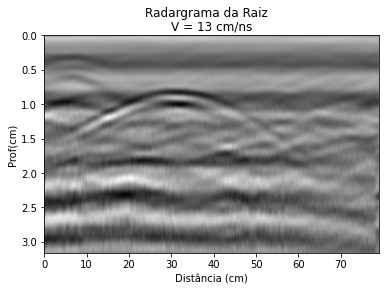

In [6]:
plt.imshow(cdp1,aspect='auto',interpolation='bicubic', cmap=plt.cm.gray_r,extent=[0*dtr, ntrace*dtr, ntime*dt, 0*dt])

plt.title('V = 13 cm/ns')
plt.suptitle('Radargrama da Raiz')
plt.xlabel('Distância (cm)')
plt.ylabel('Prof(cm)')

plt.show()

definindo algumas constantes

In [7]:
nz=np.shape(cdp1)[0]
nx=ntr=np.shape(cdp1)[1]
dx=0.25 #metros?
dz=0.008 #nano segundos?
dt=0.008 #nano segundos?
c=0.13 #m/ns? como faço ele entender que essa é a unidade? antes eu usava m/s...

----------------------

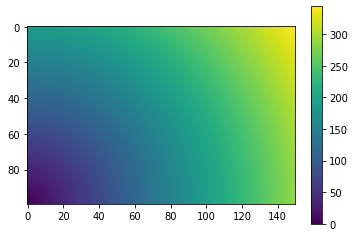

In [8]:
ntrace = 100 #numero de traços
nz = 150 
c = 0.13 #m/ns
dx = 0.25 #m
dz = 0.25 #m

time_table = np.zeros([ntrace,ns,nz]) 

for ixtrace in range(0,ntrace): #posicao do GPR
    for ixs in range(0,ns): # coord x no modelo
        for izs in range(0,nz): #coord z no modelo
            r = np.sqrt((izs*dz)**2 + (ixtrace*dx - ixs*dx)**2)
            if r!=0:
                time_table[ixtrace,ixs,izs]=r/c
            elif r==0:
                time_table[ixtrace,ixs,izs]=1e-10

plt.imshow(time_table)
plt.colorbar()
plt.show()

In [10]:
#esse código eu tirei de um antigo, zoomodel para raizes

app=3

CT = np.zeros([nx,nz])
MM = np.zeros([nx,nz])
for ixtrace in range(0,ntrace):
    istart=int( (ixtrace-1)-app);
    iend=int(1+ (ixtrace-1)+app);
    if istart<0:
        istart=0
    if iend>ntrace:
        iend=ntrace
    for ixs in range(istart-1,iend):
        #print(ixs)
        for izs in range(0,nz):
            r = np.sqrt((ixtrace*dx-ixs*dx)**2+(izs*dz)**2);
            if r!=0:
                CT[ixs,izs] = izs*dz/r;
            else:
                CT[ixs,izs]=0

---------------------

definindo o modelo de vagarosidade

In [6]:
#modelo de vagarosidade, 1/velocidade, ns/metros
SW=np.ones([nz,ntr])*1/c

#print(1/c)

criando a tabela do tempo de trânsito


Como o GPR é commmon-offset, vamos ter que mudar a forma como calcula essa tabela? Ou é a mesma coisa pra common-shot?

In [25]:
#TT=df.raymodel3(SW,dx,ntr,"Data/GPR_files/TTh_GPR_v13.npy")

100%|██████████████████████████████████████████████████████████████████████████████| 316/316 [1:49:03<00:00, 20.71s/it]


In [15]:
with open('Data/GPR_files/TTh_GPR_v13.npy', 'rb') as f:
    TTh = np.load(f)

timer=np.round(TTh/dt)+1

FileNotFoundError: [Errno 2] No such file or directory: 'Data/GPR_files/TTh_GPR_v13.npy'

fiz uma migração convencional pelo reflex, pretendo usar esse dado pra calcular a função peso



In [16]:
migdata = np.loadtxt("Data/GPR_files/FILE_172_migrated3.ASC")
migdata_envelope = np.loadtxt("Data/GPR_files/FILE_172_migrated4.ASC")

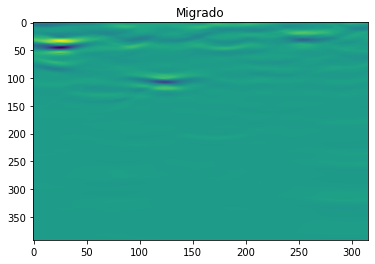

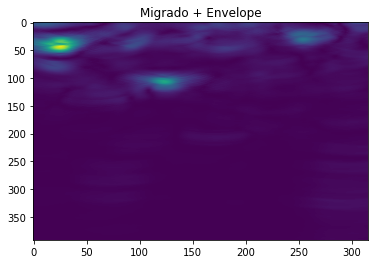

In [17]:
#print(np.shape(migdata))

migdata = migdata[120:,:]
migdata_envelope = migdata_envelope[120:,:]

#print(np.shape(migdata))

plt.imshow(migdata,aspect="auto")
plt.title("Migrado")
plt.show()

plt.imshow(migdata_envelope,aspect="auto")
plt.title("Migrado + Envelope")
plt.show()

calculando o peso, não sei se uso a seção migrada ou o envelope da seção migrada...

In [33]:
pmin = -1 #45 graus
pmax = 1
dp = 0.2
xwin=zwin=5
x_ini=z_ini=5

pm,sm = df.local_window(migdata_envelope,xwin,zwin,x_ini,z_ini,dx,dz,pmin,pmax,dp)

with open("Data/GPR_files/pm", "wb") as f: 
    np.save(f, pm)
    
with open("Data/GPR_files/sm", "wb") as f: 
    np.save(f, sm)

100%|██████████| 392/392 [00:18<00:00, 20.69it/s]


In [34]:
with open("Data/GPR_files/pm", "rb") as f:
    pm = np.load(f)

with open("Data/GPR_files/sm", "rb") as f:
    sm = np.load(f)

Alguma coisa está dando errado aqui, essas imagens estão ficando muito esquisitas... Normalmente fica algo bem parecido com a imagem migrada original

Será que a mudança de segundos pra nanosegundos faz essa confusão nas funções? 

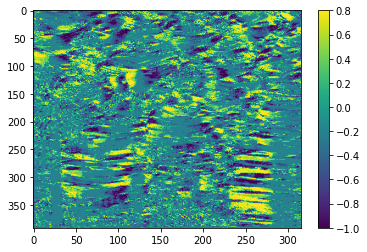

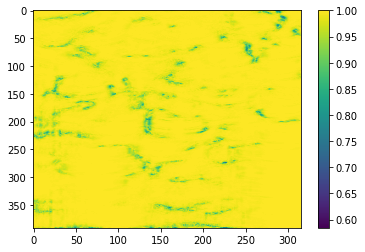

In [35]:
plt.imshow(pm,aspect="auto")
plt.colorbar()

plt.show()

plt.imshow(sm,aspect="auto")
plt.colorbar()
plt.show()

In [36]:
m_theta = np.arctan(pm)
X = np.sin(m_theta)
Y = np.cos(m_theta)

definindo constantes para a migração

In [12]:
dwin=dt
win=5*dt #Time Window
app_ref=20 #Aperture for conventional migration
app_dif=80 #Aperture for diffraction migration

gather1 = cdp1
isx = 75 #o que eu faço aqui? como é common offset, não tem isx

******

### O grande desafio está aqui!

Temos que arrumar a nossa função de migração de difrações para considerar um dado common-offset, já que a original está definida para dados common-shot. Também não sei se temos que fazer modificações por conta das unidades diferentes do dado de GPR (nanosegundos). 

In [13]:
def gprKirchhoffMigration(gather,isx,dx,dz,dt,win,dwin,app_ref,app_dif,TTh,X,Y,sm):
    
    gather = np.array(gather)
    gather = df.phase_shift(gather)

    timer=np.round(TTh/dt)+1

    window = np.arange(-win,win,dwin)
    [nt,ntr]=gather.shape
    [ntr2,nz,nx]=timer.shape
    if ntr!=ntr2:
        print('Gather and traveltime table have different trace numbers')
        
    refl_mig = np.zeros([nz,nx])
    #diff_mig = np.zeros([nz,nx])

    IX = np.arange(0,nx*dx,dx)
    IZ = np.arange(0,nz*dz,dz)
    [IIX,IIZ] = np.meshgrid(IX,IZ)
    
    # Loop over each trace of the shot gather at src isx
    for igx in tqdm(range(0,ntr)):
        
        #testando sem os pesos só pra ver se migra certo...
        #w = df.peso(TTh,dt,X,Y,igx,isx)
        #w_reff = (w**4)*(sm)
        #w_diff = (1-(w**4))
        
        trace_reflwin = np.zeros([nz,nx])
        #trace_diffwin = np.zeros([nz,nx])
        
        ################################################
        ################################################
        ### MUDAR AQUI PARA CONSIDERAR COMMON-OFFSET ###
        R = np.sqrt(IIZ**2 + (IIX-(igx+isx)/2*dx)**2)
        #r = np.sqrt((ixtrace*dx-ixs*dx)**2+(izs*dx)**2)
        ################################################
        ################################################
        
        r_mask = (R==0)
        R[r_mask]= dx/1000
        obli = IIZ/R
        trace_appref = df.taper(ntr,nz,app_ref,isx,igx)
        #trace_appdif = taper(ntr,nz,app_dif,isx,igx) 

        for j in range(len(window)): #somar amplitudes da curva de difração com uma janela 
            t = timer[isx,0:nz,0:nx] + timer[igx,0:nz,0:nx] #t_{d}
            twin = t + window[j]
            t2 = (twin<nt)*twin 
            trace1=gather.T[np.ix_([igx],t2.flatten().astype(np.int32))] 
            trace_refl1 = trace1.reshape([nz,nx])#*(w_reff)
            #trace_diff1 = trace1.reshape([nz,nx])#*(w_diff)
            trace_refl = trace_refl1*trace_appref
            #trace_diff = trace_diff1*trace_appdif
            trace_reflwin = trace_reflwin + trace_refl
            #trace_diffwin = trace_diffwin + trace_diff

        refl_mig[0:nz,0:nx] = refl_mig[0:nz,0:nx] + trace_reflwin*obli
        #diff_mig[0:nz,0:nx] = diff_mig[0:nz,0:nx] + trace_diffwin*obli

    #mig_final = np.add.reduce(migs)
    #refl_mig = np.add.reduce(refl_migs)
    #diff_mig = np.add.reduce(diff_migs)
        
    return refl_mig#,diff_mig

Para testar a migração, é só rodar essa célula

100%|████████████████████████████████████████████████████████████████████████████████| 316/316 [00:14<00:00, 22.23it/s]


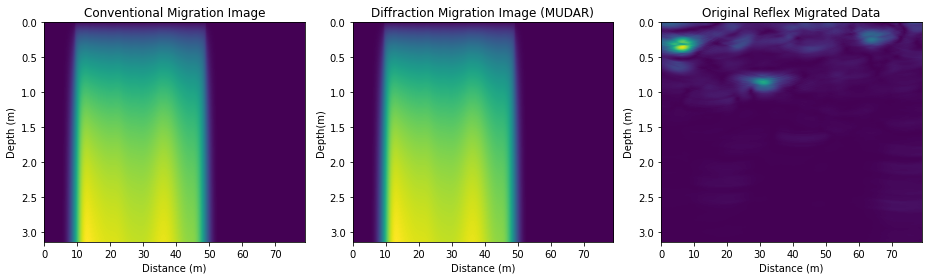

In [16]:
refl = gprKirchhoffMigration(cdp1,isx,dx,dz,dt,win,dwin,app_ref,app_dif,TTh,X,Y,sm)
#refl,diff = gprKirchhoffMigration(cdp1,isx,dx,dz,dt,win,dwin,app_ref,app_dif,TTh,X,Y,sm)
#refl,diff = df.kirchhoffMigration(cdp1,isx,dx,dz,dt,win,dwin,app_ref,app_dif,TTh,X,Y,sm)

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(13,4))

ax1.imshow(refl, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax1.set_title("Conventional Migration Image")
ax1.set_xlabel("Distance (m)")
ax1.set_ylabel("Depth (m)")

ax2.imshow(refl, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax2.set_title("Diffraction Migration Image (MUDAR)")
ax2.set_xlabel("Distance (m)")
ax2.set_ylabel("Depth(m)")

ax3.imshow(migdata_envelope, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax3.set_title("Original Reflex Migrated Data")
ax3.set_xlabel("Distance (m)")
ax3.set_ylabel("Depth (m)")

plt.tight_layout()
plt.show()